<a href="https://colab.research.google.com/github/ero2003730/Faculdade/blob/main/Enzo_Reis_de_Oliveira_Renan_Leite_AULA_PRATICA_IV_Regras_Associacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Quinto Semestre/IA/Aulas_Praticas/kc_house_data_with_social_classes.csv') # abre o arquivo CSV 'train.csv' presente dentro do ZIP

In [ ]:
data.head() # mostra o cabeçalho presentes nas amostras do conjunto de treinamento

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Social Class
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,lower
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,lower middle
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,lower
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,lower middle
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,lower middle


In [ ]:
data.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'Social Class'],
      dtype='object')

In [ ]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21613 non-null  int64  
 5   bathrooms      21613 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21611 non-null  float64
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [ ]:
data.isnull().sum() # dados faltantes ou NaN

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Social Class     0
dtype: int64

In [ ]:
# como NaN sempre nos causa problemas, (1) retiramos esse atributo ou (2) preenchemos com valores médios
np.where(data['sqft_above'].isnull().values==True)

(array([10, 17]),)

In [ ]:
print(data.values[10])
print(data.values[17])

[10 1736800520 '20150403T000000' 662500.0 3 2.5 3560 9796 1.0 0 0 3 8 nan
 1700 1965 0 98007 47.6007 -122.145 2210 8925 'upper middle']
[17 6865200140 '20140529T000000' 485000.0 4 1.0 1600 4300 1.5 0 0 4 7 nan
 0 1916 0 98103 47.6648 -122.343 1610 4300 'lower middle']


In [ ]:
data = data.drop([10, 17])

In [ ]:
data.isnull().sum() # dados faltantes ou NaN

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Social Class     0
dtype: int64

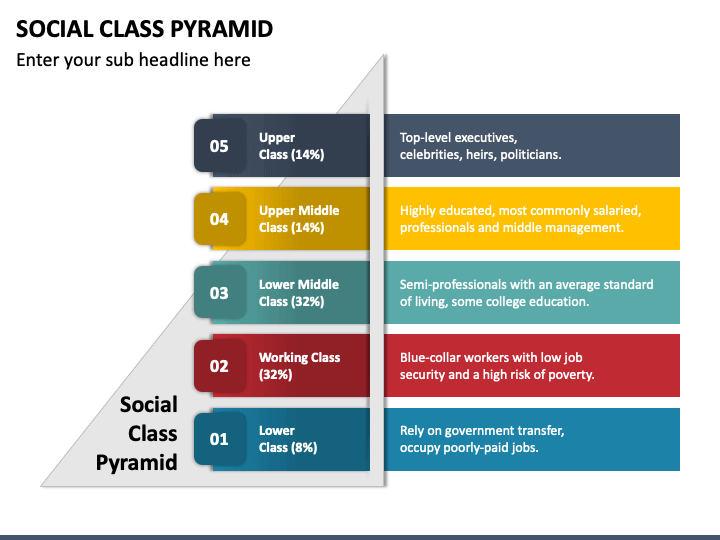

lower class < 234000 -> 8% of the population

234000 <= working class < 399500 -> 32% of the population

399500 <= lower middle class < 612000 -> 32% of the population

612000 <= upper middle class < 799000 -> 14% of the population

765000 <= upper class <= 1960000  -> 13% of the population

1960000 < toppest class 1% of the population

In [ ]:
data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Social Class
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,lower
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,lower middle
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,lower
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,lower middle
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,lower middle


In [ ]:
data.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'Social Class'],
      dtype='object')

In [ ]:
# Visualizar todas as diferentes classes sociais presentes na coluna "Social Class"
classes_sociais = data['Social Class'].unique()

# Imprimir as diferentes classes sociais
print(classes_sociais)

['lower' 'lower middle' 'upper' 'working' 'upper middle' 'toppest']


In [ ]:
data['view']
print(data['view'].value_counts())

0    19487
2      963
3      510
1      332
4      319
Name: view, dtype: int64


## Os atributos que acredita-se que ajudariam no algoritmo de RA são: 'bedrooms', 'price', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode' e 'social class'. Então iremos trabalhar apenas com esses para a RA


In [ ]:
# Lista dos atributos desejados
atributos_desejados = ['bedrooms','price', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode', 'Social Class']

# Criar um novo DataFrame com os atributos desejados
novo_dataframe = data.loc[:, atributos_desejados]

# Converter as colunas categóricas em dummies
novo_dataframe = pd.get_dummies(novo_dataframe, columns=['bedrooms', 'price', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'zipcode', 'Social Class'])


In [ ]:
from sklearn.metrics import silhouette_score

def determinar_numero_clusters(nome_classe, dataframe):
    # Filtrar instâncias da classe social específica
    classe_social = dataframe[dataframe['Social Class_' + nome_classe] == 1].copy()
    # Remover a coluna 'Social Class' após a filtragem
    classe_social.drop(columns=['Social Class_' + nome_classe], inplace=True)
    
    # Inicializar variáveis
    best_k = 2
    best_silhouette_avg = -1
    
    for k in range(2, 11):  # Testar valores de k de 2 a 10 (pode ajustar conforme necessário)
        kmeans = KMeans(n_clusters=k, random_state=0)
        labels = kmeans.fit_predict(classe_social)
        silhouette_avg = silhouette_score(classe_social, labels)
        
        # Atualizar o número ideal de clusters se a média de silhueta for maior
        if silhouette_avg > best_silhouette_avg:
            best_silhouette_avg = silhouette_avg
            best_k = k
    
    return best_k

In [ ]:
from sklearn.cluster import KMeans
# Função para realizar clusterização em uma classe social específica
def clusterizar_classe_social(nome_classe, dataframe):
    # Filtrar instâncias da classe social específica
    classe_social = dataframe[dataframe['Social Class_' + nome_classe] == 1].copy()

    # Remover a coluna 'Social Class' após a filtragem
    classe_social.drop(columns=['Social Class_' + nome_classe], inplace=True)

    # Aplicar clusterização com K-means
    kmeans = KMeans(n_clusters=determinar_numero_clusters(nome_classe,dataframe))  # Defina o número de clusters desejado
    classe_social['cluster'] = kmeans.fit_predict(classe_social)

    return classe_social

# Realizar clusterização para cada classe social
classe_lower = clusterizar_classe_social('lower', novo_dataframe)
classe_lower_middle = clusterizar_classe_social('lower middle', novo_dataframe)
classe_upper = clusterizar_classe_social('upper', novo_dataframe)
classe_working = clusterizar_classe_social('working', novo_dataframe)
classe_upper_middle = clusterizar_classe_social('upper middle', novo_dataframe)
classe_toppest = clusterizar_classe_social('toppest', novo_dataframe)

In [ ]:
from sklearn.cluster import KMeans

# Função para realizar clusterização em uma classe social específica
def clusterizar_classe_social(nome_classe, dataframe):
    # Filtrar instâncias da classe social específica
    classe_social = dataframe[dataframe['Social Class_' + nome_classe] == 1].copy()

    # Remover a coluna 'Social Class' após a filtragem
    classe_social.drop(columns=['Social Class_' + nome_classe], inplace=True)

    # Aplicar clusterização com K-means
    kmeans = KMeans(n_clusters=3)  # Defina o número de clusters desejado
    classe_social['cluster'] = kmeans.fit_predict(classe_social)

    return classe_social

# Realizar clusterização para cada classe social
classe_lower = clusterizar_classe_social('lower', novo_dataframe)
classe_lower_middle = clusterizar_classe_social('lower middle', novo_dataframe)
classe_upper = clusterizar_classe_social('upper', novo_dataframe)
classe_working = clusterizar_classe_social('working', novo_dataframe)
classe_upper_middle = clusterizar_classe_social('upper middle', novo_dataframe)
classe_toppest = clusterizar_classe_social('toppest', novo_dataframe)

In [ ]:
from tabulate import tabulate
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Função para imprimir as regras em forma de tabela
def imprimir_tabela_regras(nome_classe, classe_social):
    # Aplicar o algoritmo de Apriori para encontrar os itens frequentes
    frequent_itemsets = apriori(classe_social.drop(columns=['cluster']), min_support=0.05, use_colnames=True)

    # Aplicar o algoritmo de regras de associação
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    # Ordenar as regras por confiança e lift
    rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])

    print(f"Regras para a classe social '{nome_classe}':")
    print()

    # Filtrar as colunas relevantes para a tabela
    colunas_relevantes = ['frequencia', 'antecedents', 'consequents', 'antecedent support', 'consequent support', 'support', 'confidence', 'lift']

    # Adicionar a coluna "frequencia"
    rules['frequencia'] = rules['support'] * len(classe_social)

    # Filtrar os 50 relacionamentos mais frequentes
    top_50_frequentes = rules.nlargest(50, 'frequencia')

    # Filtrar os 10 relacionamentos com maior confiança
    top_10_confianca = rules.nlargest(10, 'confidence')

    # Verificar se os 10 relacionamentos com maior confiança estão dentro dos 50 mais frequentes
    if len(top_10_confianca) <= 50:
        regras_filtradas = top_50_frequentes
    else:
        regras_filtradas = top_10_confianca

    regras_formatadas = regras_filtradas.copy()
    regras_formatadas['antecedents'] = regras_formatadas['antecedents'].apply(lambda x: ', '.join(list(x)))
    regras_formatadas['consequents'] = regras_formatadas['consequents'].apply(lambda x: ', '.join(list(x)))
    tabela = tabulate(regras_formatadas[colunas_relevantes], headers='keys', tablefmt='fancy_grid')
    print(tabela)
    print()


In [ ]:
imprimir_tabela_regras('lower', classe_lower)

Regras para a classe social 'lower':

╒═════╤══════════════╤═══════════════════════════╤═══════════════════════════╤══════════════════════╤══════════════════════╤═══════════╤══════════════╤═════════╕
│     │   frequencia │ antecedents               │ consequents               │   antecedent support │   consequent support │   support │   confidence │    lift │
╞═════╪══════════════╪═══════════════════════════╪═══════════════════════════╪══════════════════════╪══════════════════════╪═══════════╪══════════════╪═════════╡
│  14 │          973 │ bedrooms_3                │ view_0                    │             0.567693 │             0.993027 │  0.565369 │     0.995906 │ 1.0029  │
├─────┼──────────────┼───────────────────────────┼───────────────────────────┼──────────────────────┼──────────────────────┼───────────┼──────────────┼─────────┤
│  15 │          973 │ view_0                    │ bedrooms_3                │             0.993027 │             0.567693 │  0.565369 │     0.569339 │ 

# O perfil da classe social lower é bem diversificado, não parece haver muitos padrões de combinações que são muito frequentes, visto que o maior suporte equivale a pouco mais da metade do conjunto total de dados. O perfil da casa é de uma casa que não desperta muito interesse em possíveis compradores porque uma maioria esmagadora de 99% delas tem view de 0. São casas que na média tem um andar, três quartos, um banheiro, possuem nota de condição até 4 e nota até 7, significando casas feitas com materiais velhos, baratos, materiais reusados e materiais comuns, com arranjo e arquitetura simples. 




In [ ]:
imprimir_tabela_regras('lower middle', classe_lower_middle)

Regras para a classe social 'lower middle':

╒═════╤══════════════╤════════════════════════════╤═════════════════════════╤══════════════════════╤══════════════════════╤═══════════╤══════════════╤═════════╕
│     │   frequencia │ antecedents                │ consequents             │   antecedent support │   consequent support │   support │   confidence │    lift │
╞═════╪══════════════╪════════════════════════════╪═════════════════════════╪══════════════════════╪══════════════════════╪═══════════╪══════════════╪═════════╡
│  85 │         4306 │ condition_3                │ view_0                  │             0.667872 │             0.928427 │  0.622614 │     0.932236 │ 1.0041  │
├─────┼──────────────┼────────────────────────────┼─────────────────────────┼──────────────────────┼──────────────────────┼───────────┼──────────────┼─────────┤
│  84 │         4306 │ view_0                     │ condition_3             │             0.928427 │             0.667872 │  0.622614 │     0.670612 │

# A classe lower middle é composta de casas que em sua maioria tem nota de condição de no mínimo 3, que indica casas com condições comuns, não muito velhas e que seus componentes e estrutura estão em bom estado e com boa vida útil. Na classe lower, casas com condições nota 3 e 4 eram uma fração não muito grande do todo enquanto na classe lower middle é mais da metade de toda a classe. É possível notar também que nessa classe há mais casas de nota geral 7 e 8. O perfil das casas da classe lower middle ainda é de casas que em sua maioria não são muito vistas por possíveis compradores, mas que tem nota geral em média entre 7 e 8, nota de condições 3, com um andar e podendo ter dois. Notamos que a quantidade de andares não tem relação significativa com a casa ser muito procurada ou não. Nessa classe social vemos que é provável que se uma casa possui uma nota geral boa como 7 ou 8 geralmente ela possui nota de condições de 3 também, que é considerado bom. Normalmente também casas com dois banheiros possuem nota de condições igual a 3.



In [ ]:
imprimir_tabela_regras('upper', classe_upper)

Regras para a classe social 'upper':

╒═════╤══════════════╤═════════════════════════════════════╤═════════════════════════════════╤══════════════════════╤══════════════════════╤═══════════╤══════════════╤═════════╕
│     │   frequencia │ antecedents                         │ consequents                     │   antecedent support │   consequent support │   support │   confidence │    lift │
╞═════╪══════════════╪═════════════════════════════════════╪═════════════════════════════════╪══════════════════════╪══════════════════════╪═══════════╪══════════════╪═════════╡
│  73 │         1355 │ condition_3                         │ view_0                          │             0.653996 │             0.706572 │  0.48135  │     0.736013 │ 1.04167 │
├─────┼──────────────┼─────────────────────────────────────┼─────────────────────────────────┼──────────────────────┼──────────────────────┼───────────┼──────────────┼─────────┤
│  72 │         1355 │ view_0                              │ condition_3

# O perfil de casas da classe upper é composta por casas que em sua maioria possuem dois andares, casas com nota de condições 3, quatro quartos e com nota geral que pode chegar a 9. A tabela nos mostra que é normal para essa classe uma casa com 4 quartos e que tem nota de condição 3 ter mais de um andar.



In [ ]:
imprimir_tabela_regras('working', classe_working)

Regras para a classe social 'working':

╒═════╤══════════════╤═════════════════════════════════╤═════════════════════════╤══════════════════════╤══════════════════════╤═══════════╤══════════════╤═════════╕
│     │   frequencia │ antecedents                     │ consequents             │   antecedent support │   consequent support │   support │   confidence │    lift │
╞═════╪══════════════╪═════════════════════════════════╪═════════════════════════╪══════════════════════╪══════════════════════╪═══════════╪══════════════╪═════════╡
│  83 │         4459 │ condition_3                     │ view_0                  │             0.661899 │             0.967346 │  0.644271 │     0.973368 │ 1.00623 │
├─────┼──────────────┼─────────────────────────────────┼─────────────────────────┼──────────────────────┼──────────────────────┼───────────┼──────────────┼─────────┤
│  82 │         4459 │ view_0                          │ condition_3             │             0.967346 │             0.661899 │  

# As casas da classe working tem um perfil médio com nota geral de 7, nota de condição de 3, com um só andar em sua maioria mas com quantidade significativa de casas com dois andares, com três quartos e pouca procura para compra. Pela tabela podemos ver que normalmente há uma relação entre a quantidade de andares da casa e sua nota de condições, sendo casas com dois andares mais propensas a serem casas com nota 3, de mesmo modo que casas que são nota 3 de condições podem ser vistas com mais facilidade tendo dois andares. Casas com três quartos, um andar e que não foram visitadas também são mais propensas a terem nota geral de 7.



In [ ]:
imprimir_tabela_regras('upper middle', classe_upper_middle)

Regras para a classe social 'upper middle':

╒═════╤══════════════╤════════════════════════════╤════════════════════════════╤══════════════════════╤══════════════════════╤═══════════╤══════════════╤═════════╕
│     │   frequencia │ antecedents                │ consequents                │   antecedent support │   consequent support │   support │   confidence │    lift │
╞═════╪══════════════╪════════════════════════════╪════════════════════════════╪══════════════════════╪══════════════════════╪═══════════╪══════════════╪═════════╡
│  77 │         1646 │ condition_3                │ view_0                     │             0.628808 │             0.859934 │  0.545033 │     0.866772 │ 1.00795 │
├─────┼──────────────┼────────────────────────────┼────────────────────────────┼──────────────────────┼──────────────────────┼───────────┼──────────────┼─────────┤
│  76 │         1646 │ view_0                     │ condition_3                │             0.859934 │             0.628808 │  0.54503

# As casas da classe upper middle tem um perfil que em sua maioria compõe casas com nota de condições de 3 a 4, consideradas notas boas, com nota geral podendo incluir notas 9, que é usada para classificar casas com arquitetura superior e design internos e externos de maior qualidade, normalmente com dois andares e mais de dois banheiros, juntando com quatro quartos. Apesar de a maioria das casas pertencentes a essa classe não terem sido visitadas por possíveis compradores, a proporção é menor que nas classes lower, lower middle e working, principalmente se a casa tiver nota geral igual a 9, indicando alguma procura por casas com essas características. A tabela nos mostra que uma casa com dois andares tem 1.5 vezes mais chance de ter pelo menos dois banheiros e não ter sido procurada para compra. Também nos diz que uma casa com quatro quartos é mais provavél de ter dois andares e não ter sido visitada para compra. 






In [ ]:
imprimir_tabela_regras('toppest', classe_toppest)

Regras para a classe social 'toppest':

╒═════╤══════════════╤═════════════════════════╤═════════════════════════╤══════════════════════╤══════════════════════╤═══════════╤══════════════╤═════════╕
│     │   frequencia │ antecedents             │ consequents             │   antecedent support │   consequent support │   support │   confidence │    lift │
╞═════╪══════════════╪═════════════════════════╪═════════════════════════╪══════════════════════╪══════════════════════╪═══════════╪══════════════╪═════════╡
│  95 │          101 │ condition_3             │ floors_2.0              │             0.619266 │             0.651376 │  0.463303 │     0.748148 │ 1.14857 │
├─────┼──────────────┼─────────────────────────┼─────────────────────────┼──────────────────────┼──────────────────────┼───────────┼──────────────┼─────────┤
│  94 │          101 │ floors_2.0              │ condition_3             │             0.651376 │             0.619266 │  0.463303 │     0.711268 │ 1.14857 │
├─────┼─────

# As casas que se encaixam na classe toppest fazem parte do grupo de casas que possuem qualidade e notas mais elevadas. São casas com nota geral maior que 10, mais de 5 quartos, incluindo casas beira-mar, com mais de dois andares e com nota de condições maior que 3. A primeira coisa que chama a atenção na análise é que ela indica uma forte relação entre a casa ser beira-mar e ter sido visitada por possíveis compradores. Casas desse tipo tem mais chance de serem visitadas e pesquisadas. Podemos também perceber o detalhe de que uma casa situada no zipcode 98004 é mais provavél de ter nota de condições igual a 3. Esse zipcode se refere a cidade de Bellevue, que é uma cidade moderna que fica bem localizada no entorno de uma grande metrópole, que no caso é Seattle. É sede de empresas de tecnologia e serviços, além de estar situada na região do lago Washington. É uma cidade que pode possuir casas da classe upper porque é provável da casa ter nota de condições igual a 3, e casas com essa nota também tem chances de fazer parte do conjunto de casas que tem dois andares e nota geral 11, que é bem alta.


